# MBA em Ciência de Dados
## Técnicas Avançadas de Captura e Tratamento de Dados


### <span style="color:darkred">Módulo III - Aquisição e Transformação de Dados</span>


### <span style="color:darkred">Normalização de atributos</span>

Material Produzido por Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

### Intervalos de valores de variáveis

Variáveis possuem intervalos diferentes de valores possíveis devido a sua natureza.

A princípio é positivo que tenhamos acesso ao valor real das variáveis, mas a depender do modelo que utilizamos, variáveis de maior magnitude dominam as estatísticas.


In [1]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# carregando dados
data = pd.read_csv("./dados/municipios_mba.csv")
data.head()

,gid,UF,nome,Censo,PIB,pop,classe,desemprego,pop_sanea,expec_vida,pobreza,IDH,urbaniz,dens_pop_urbana
0,752,ACRE,Acrelândia,2010.0,151120.015625,12241,2,5.2,33.532382,73.6,19.2,660,rural,muito baixa
1,747,ACRE,Assis Brasil,2010.0,48347.300781,5662,1,5.0,32.252163,74.2,18.9,664,rural,muito baixa
2,748,ACRE,Brasiléia,2010.0,194979.828125,20238,1,3.0,31.663354,75.3,19.5,667,baixo,média
3,754,ACRE,Bujari,2010.0,88708.031250,6772,2,4.8,33.501357,73.4,19.1,659,rural,muito baixa
4,751,ACRE,Capixaba,2010.0,89052.679688,9287,1,4.4,33.431383,75.4,18.1,661,rural,muito baixa


In [2]:
for var in data:
     print(var,"- tipo: ", data[var].dtype.name)

gid - tipo:  int64
UF - tipo:  object
nome - tipo:  object
Censo - tipo:  float64
PIB - tipo:  float64
pop - tipo:  int64
classe - tipo:  int64
desemprego - tipo:  float64
pop_sanea - tipo:  float64
expec_vida - tipo:  float64
pobreza - tipo:  float64
IDH - tipo:  int64
urbaniz - tipo:  object
dens_pop_urbana - tipo:  object


Vamos estudar as variáveis abaixo, exibindo seus gráficos de caixa.

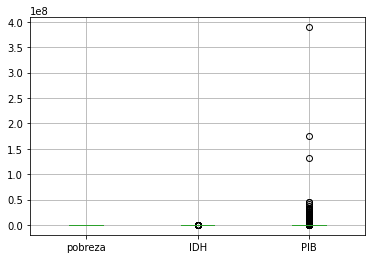

In [3]:
attrs = ['pobreza', 'IDH', 'PIB']
attrs_cat = ['pobreza', 'IDH', 'PIB', 'UF', 'nome']
data.boxplot(attrs)

Muitos métodos, em especial de aprendizado, utilizam funções de divergência/distância para aprender.

Por exemplo, podemos utilizar a distância Euclidiana entre dois vetores $a$ e $b$ dada por:
$$dEuc(a,b) = \sqrt{\sum^n_{i=1} (a_i - b_i)^2}$$

In [4]:
# implementando a funcao
def dEuclidean(a, b):   
    return np.sqrt(np.sum((a - b) ** 2))

Vamos selecionar um grupo de exemplos para comparar

In [5]:
np.random.seed(2)
select_data = np.random.rand(data.shape[0])<0.0015

# aqui copiamos e resetamos o índice do dataframe
subdata = data[select_data].copy().reset_index()
size = subdata[attrs].shape[0]
print("Exemplos selecionados: ", size)
subdata

Exemplos selecionados:  5


,index,gid,UF,nome,Censo,PIB,pop,classe,desemprego,pop_sanea,expec_vida,pobreza,IDH,urbaniz,dens_pop_urbana
0,1690,3099,MINAS GERAIS,Campos Gerais,2010.0,240981.671875,27964,1,6.8,76.217741,77.3,4.3,738,NaN,NaN
1,2737,2336,PARAÍBA,São Domingos,2010.0,12841.704102,2822,1,9.2,49.034312,74.3,16.9,657,NaN,NaN
2,3412,1280,PIAUÍ,Campo Largo do Piauí,2010.0,18738.593750,7035,1,4.6,29.272712,71.4,21.2,643,NaN,NaN
3,3468,949,PIAUÍ,Jardim do Mulato,2010.0,14268.646484,4318,1,6.0,29.503772,70.4,21.9,647,NaN,NaN
4,4704,5000,SANTA CATARINA,Xaxim,2010.0,538854.125000,25444,2,8.3,74.267921,79.5,0.9,778,NaN,NaN


In [6]:
# selecionando um exemplo próximo ao primeiro para comparar
ind_0 = subdata.loc[0,'index']
a = np.array(data[attrs].loc[ind_0+2,:])

print("\nExemplo 'a' para comparacao: ")
print(data.loc[ind_0+2,attrs_cat])
print("Vetor de atributos: ")
print(a)

# percorremos todos, comparando com 'a'
dists = np.empty(size)
for i in range(size):
    b = np.array(subdata[attrs].loc[i,:])
    dists[i] = dEuclidean(a,b)

print("\nDistancias obtidas entre 'a' e os selecionados: ")
print(np.round(dists,1))


Exemplo 'a' para comparacao: 
pobreza             5.5
IDH                 732
PIB             28926.7
UF         MINAS GERAIS
nome              Canaã
Name: 1692, dtype: object
Vetor de atributos: 
[5.50000000e+00 7.32000000e+02 2.89267109e+04]

Distancias obtidas entre 'a' e os selecionados: 
[212055.   16085.2  10188.5  14658.3 509927.4]


Vamos agora inspecionar o exemplo relativo à menor distância:

In [7]:
# argmin retorna a posicao com o valor mínimo
print(subdata.loc[np.argmin(dists),attrs_cat])

pobreza                    21.2
IDH                         643
PIB                     18738.6
UF                        PIAUÍ
nome       Campo Largo do Piauí
Name: 2, dtype: object


Note que foi selecionado um exemplo de outro estado e com valor de IDH  (643 vs 732) e pobreza (21.2 vs 5.5) bastante diferente!

Na verdade, esses atributos tem peso pequeno na distância.

In [8]:
# vamos zerar esses atributos, e recomputar as distâncias
a[:2] = 0
print("Novo vetor de atributos:")
print(a)

dists = np.empty(size)
for i in range(size):
    b = np.array(subdata[attrs].loc[i,:])
    dists[i] = dEuclidean(a,b)

print("\nNovas distâncias e exemplo mais próximo:")
print(np.round(dists,1))
print(subdata.loc[np.argmin(dists),attrs_cat])


Novo vetor de atributos:
[    0.            0.        28926.7109375]

Novas distâncias e exemplo mais próximo:
[212056.2  16098.4  10208.4  14672.4 509928. ]
pobreza                    21.2
IDH                         643
PIB                     18738.6
UF                        PIAUÍ
nome       Campo Largo do Piauí
Name: 2, dtype: object


---

## Normalização

Há várias formas de normalização e sua escolha depende também do cenário.

Alguns desses métodos também são chamados de reescalamento de atributos  ou *feature (re)scaling*

1. Normalização min-max
2. Normalização pela média
3. Padronização $z$-score (*whitening*)
4. Normalização de soma unitária (ou norma L1)
5. Normalização normas L2 e L$\infty$


### Min-max

Gera um atributo $x'$ num novo intervalo $[a,b]$

$$x' = a+\frac{[x-\min(x)](b-a)}{\max(x)-\min(x)}$$

para $[0,1]$
 
$$x' = \frac{x-\min(x)}{\max(x)-\min(x)}$$

### Média

Gera um atributo $x$ centralizado com relação a média, em que $\bar{x}$ é a média entre todos os valores de $x$

$$x' = \frac{x-\bar{x}}{\max(x)-\min(x)}$$


### Padronização $z$-score (*whitening*)

Gera um atributo $x$ centralizado com relação a média e cujo desvio padrão passa a ser unitário

$$x' = \frac{x-\bar{x}}{\sigma},$$
$\bar{x}$ é a média entre todos os valores de $x$,

$\sigma$ é o desvio padrão calculado a partir de $x$



--- 



### Soma unitária (ou norma L1)

Gera um atributo $x$ cuja soma dos valores é unitária. Isso permite por exemplo interpretar o atributo como um vetor distribuição de probabilidade.

$$x' = \frac{x}{||x_i||},$$
$||x_i||$ é a norma do vetor $x$.

Calculada pela soma dos valores absolutos $||x_i|| = \sum_i |x_i|$, essa normalização é também chamada de norma L1 pois é a norma considerada no denominador. 

Temos ainda outras opções:

**norma L2 (ou Euclidiana)**
$$x' = \frac{x}{||x_i||_2},$$
    sendo $||x_i||_2 = \sqrt{\sum^n_{i=1} x_i^2}$, 



**norma L$\infty$ (ou Infinita, ou Chessboard)**
$$x' = \frac{x}{||x_i||_\infty},$$

sendo $||x_i||_\infty = \max_i(x_i)$, 

---

Vamos calcular o $z$-score das variáveis e recomputar as distâncias!

In [9]:
# percorrendo variáveis e normalizando
# pelo método z-score
for var in attrs:
    # computa média e desvio padrao
    var_mean = data[var].mean()
    var_sigm = data[var].std()

    # computa normalizacao
    var_norm = (data[var] - var_mean) / var_sigm

    # novo nome e variável normalizada
    newvar = var + '_z'
    data[newvar] = var_norm

# descrevendo os novos atributos
attrs_n = ['pobreza_z', 'IDH_z', 'PIB_z']    
attrs_cat_n = ['pobreza_z', 'IDH_z', 'PIB_z', 'UF', 'nome']   
data[attrs_n].describe()

,pobreza_z,IDH_z,PIB_z
count,4.730000e+03,5.565000e+03,5.565000e+03
mean,3.364938e-16,6.332960e-16,1.021445e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.245828e+00,-1.212018e+01,-9.081290e-02
25%,-8.979751e-01,-7.829776e-01,-8.566745e-02
50%,-6.145397e-01,2.767312e-01,-7.902384e-02
75%,9.185886e-01,5.963259e-01,-5.921052e-02
max,2.181165e+00,1.925167e+00,6.125307e+01


In [10]:
np.random.seed(2)
select_data = np.random.rand(data.shape[0])<0.0015
subdata = data[select_data].copy().reset_index()
size = subdata.shape[0]
print("Exemplos selecionados: ", size)

# selecionando um exemplo próximo ao primeiro para comparar
ind_0 = subdata.loc[0,'index']
a = np.array(data[attrs_n].loc[ind_0+2,:])

print("\nExemplo 'a' para comparacao: ")
print(data.loc[ind_0+2,attrs_cat_n])
print("Vetor de atributos: ")
print(a)

dists = np.empty(size)
for i in range(size):
    b = np.array(subdata[attrs_n].loc[i,:])
    dists[i] = dEuclidean(a,b)

print("\nDistancias obtidas entre 'a' e os selecionados: ")
print(np.round(dists,1))

Exemplos selecionados:  5

Exemplo 'a' para comparacao: 
pobreza_z       -0.627423
IDH_z            0.310373
PIB_z          -0.0871641
UF           MINAS GERAIS
nome                Canaã
Name: 1692, dtype: object
Vetor de atributos: 
[-0.62742308  0.31037276 -0.08716414]

Distancias obtidas entre 'a' e os selecionados: 
[0.2 1.9 2.5 2.6 1. ]


In [11]:
# argmin retorna a posicao com o valor mínimo
print(subdata.loc[np.argmin(dists),attrs_cat_n])

pobreza_z        -0.782024
IDH_z             0.411297
PIB_z           -0.0537506
UF            MINAS GERAIS
nome         Campos Gerais
Name: 0, dtype: object


In [12]:
print(subdata.loc[np.argmin(dists),attrs_cat])
print(data[attrs_cat].loc[ind_0+2,:])

pobreza              4.3
IDH                  738
PIB               240982
UF          MINAS GERAIS
nome       Campos Gerais
Name: 0, dtype: object
pobreza             5.5
IDH                 732
PIB             28926.7
UF         MINAS GERAIS
nome              Canaã
Name: 1692, dtype: object


Uma **desvantagem** da normalização é que os valores perdem a semântica original.

Por exemplo, o que significa uma pobreza de -0.78 ?

Por isso é conveniente manter os atributos originais para depois interpretar os resultados

### <font color="blue">Em experimentos envolvendo treinamento e teste:</font> 

A normalização deve ser calculada no treinamento, e depois apenas **aplicada** no teste

Por exemplo, no caso da $z$-score:
* os valores da média e desvio padrão devem ser calculados no treinamento, 
* depois aplicados para normalizar o(s) exemplo(s) de teste

Vamos selecionar um subconjunto maior para mostrar essa idéia, sendo que o exemplo $a$ para comparação será considerado exemplo de teste.

Aqui vamos calcular a normalização apenas no subconjunto.

In [13]:
# reselecionando dados, agora um pouco mais!
np.random.seed(3)
select_data = np.random.rand(data.shape[0])<0.01
subdata = data[select_data].copy()

# vamos remover linhas com nulos e resetar o índice!
subdata = subdata.dropna().reset_index()
size = subdata.shape[0]
print("Exemplos selecionados: ", size)
subdata


Exemplos selecionados:  11


,index,gid,UF,nome,Censo,PIB,pop,classe,desemprego,pop_sanea,expec_vida,pobreza,IDH,urbaniz,dens_pop_urbana,pobreza_z,IDH_z,PIB_z
0,218,4858,BAHIA,Anguera,2010.0,26372.318359,9826,1,10.3,48.376886,73.9,17.5,661,rural,muito baixa,0.918589,-0.883902,-0.087567
1,244,4834,BAHIA,Belo Campo,2010.0,54279.222656,15185,1,8.7,51.105803,73.5,18.2,659,rural,muito baixa,1.008773,-0.917544,-0.083169
2,315,4399,BAHIA,Crisópolis,2010.0,85858.242188,20279,1,9.0,51.088871,74.1,16.7,655,rural,muito baixa,0.815521,-0.984827,-0.078193
3,357,4476,BAHIA,Ibirataia,2010.0,104637.359375,24544,1,10.1,50.641199,74.8,17.5,661,rural,muito baixa,0.918589,-0.883902,-0.075234
4,555,113,BAHIA,São Felipe,2010.0,80595.312500,20952,1,8.0,50.838526,74.0,18.0,663,rural,muito baixa,0.983006,-0.850261,-0.079023
5,582,183,BAHIA,Souto Soares,2010.0,53800.070312,19407,1,10.1,50.903280,72.3,16.9,655,rural,muito baixa,0.841288,-0.984827,-0.083245
6,663,1561,CEARÁ,Cedro,2010.0,90544.523438,25591,1,6.5,43.265475,74.6,18.3,687,rural,muito baixa,1.021656,-0.446562,-0.077455
7,860,1467,ESPIRITO SANTO,Piúma,2010.0,127082.007812,17212,1,8.3,73.872039,79.5,4.2,742,baixo,baixa,-0.794908,0.478581,-0.071698
8,1283,1743,MARANHÃO,Raposa,2010.0,100919.585938,25837,1,6.4,26.969824,69.3,26.1,644,médio,baixa,2.026564,-1.169855,-0.075820
9,5433,5488,TOCANTINS,Aparecida do Rio Negro,2010.0,40615.371094,4200,2,7.0,27.491647,73.8,11.7,696,rural,muito baixa,0.171350,-0.295175,-0.085322


In [15]:
# percorrendo variáveis e normalizando
means = []
stds = []
for var in attrs:
    var_mean = subdata[var].mean()
    var_sigm = subdata[var].std()
    # computa normalizacao
    var_norm = (subdata[var] - var_mean) / var_sigm
    # novo nome e variável normalizada
    newvar = var + '_z'
    subdata[newvar] = var_norm
    
    # guardando valores da normalizacao
    means.append(var_mean)
    stds.append(var_sigm)

# selecionando um exemplo próximo ao primeiro para comparar
ind_0 = subdata.loc[0,'index']
a = np.array(data[attrs].loc[ind_0+2,:])

print("\nExemplo 'a' para comparacao: ")
print(data.loc[ind_0+2, attrs_cat])
print(" - Vetor de atributos: ")
print(a)

anorm = (a-means)/stds
print(" - Vetor de atributos normalizado: ")
print(anorm)

dists = np.empty(size)
for i in range(size):
    b = np.array(subdata[attrs_n].loc[i,:])
    dists[i] = dEuclidean(anorm,b)

print("\n*Exemplo mais próximo")
# argmin retorna a posicao com o valor mínimo
print(subdata.loc[np.argmin(dists),attrs_cat])


Exemplo 'a' para comparacao: 
pobreza               17.4
IDH                    657
PIB                52209.5
UF                   BAHIA
nome       Antônio Cardoso
Name: 220, dtype: object
 - Vetor de atributos: 
[1.74000000e+01 6.57000000e+02 5.22095391e+04]
 - Vetor de atributos normalizado: 
[ 0.24569143 -0.61136435 -0.60122108]

*Exemplo mais próximo
pobreza            16.9
IDH                 655
PIB             53800.1
UF                BAHIA
nome       Souto Soares
Name: 5, dtype: object


**Observe** que o vetor de características poder gerar valores abaixo de -1 ou acima de 1, o que não ocorreu anteriormente quando o exemplo que comparamos foi utilizado no cálculo da normalização.

<font color="red">Assim, mesmo a informação da normalização não pode vazar do teste para o treinamento!</font>

### Resumo:

* Normalizar pode ser fundamental para obter modelos que consideram todos os atributos de forma equilibrada

* O método deve considerar as características dos dados

* Apenas o conjunto de *treinamento* deve ser usado para computar os parâmetros da normalização